In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
from PIL import Image, ImageDraw

from keras.models import Sequential

In [2]:
import pandas as pd

In [3]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
train_annots = pd.read_csv("data/train/_annotations.csv")
valid_annots = pd.read_csv("data/valid/_annotations.csv")
test_annots = pd.read_csv("data/test/_annotations.csv")

IMG_SIZE = [224, 224]

train_annots.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,ck0qd8gs6ko7j0721x25cv4o3_jpeg.rf.005f5707706e...,640,480,smoke,125,190,177,286
1,ck0t40rhdz68s0a46ekx049a6_jpeg.rf.00403179fe5f...,640,480,smoke,326,207,494,249
2,ck0m0ch9ugnna07940o8x989j_jpeg.rf.0101cdb46a16...,640,480,smoke,308,166,582,257
3,ck0rr6bfa9b3w0721aw5unwdy_jpeg.rf.00982c053d66...,640,480,smoke,241,204,310,244
4,ck0uk75x5ysls0721e5a9j891_jpeg.rf.00d7fd8503e1...,640,480,smoke,523,208,619,288


In [5]:
def display_some_train(num_displayed=2):
    for index, row in train_annots.sample(n=num_displayed).iterrows():
        img = Image.open(f"data/train/{row['filename']}")
        draw = ImageDraw.Draw(img)

        draw.line((row["xmin"], row["ymin"], row["xmax"], row["ymin"]), fill=128)
        draw.line((row["xmax"], row["ymin"], row["xmax"], row["ymax"]), fill=128)
        draw.line((row["xmin"], row["ymin"], row["xmin"], row["ymax"]), fill=128)
        draw.line((row["xmax"], row["ymax"], row["xmin"], row["ymax"]), fill=128)
        display(img)

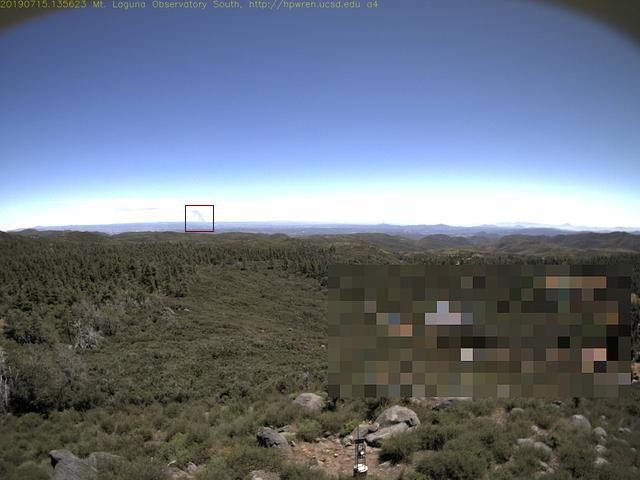

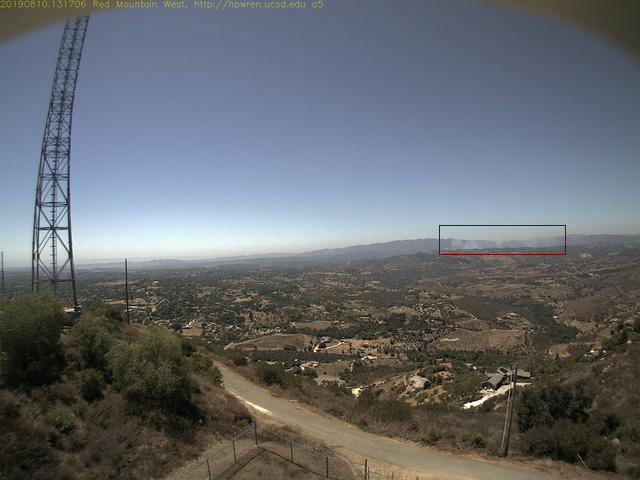

In [6]:
display_some_train()

In [7]:
Y_train = []
X_train = []

for index, row in train_annots.iterrows():
    filename = row["filename"]

    h = row["height"]
    w = row["width"]

    xmin = float(row["xmin"]) / w
    xmax = float(row["xmax"]) / w
    ymax = float(row["ymax"]) / h
    ymin = float(row["ymin"]) / h

    imagePath = f"data/train/{filename}"

    image = load_img(imagePath, target_size=IMG_SIZE)
    image = img_to_array(image)

    X_train.append(image)
    Y_train.append((xmin, ymin, xmax, ymax))

X_train = np.array(X_train, dtype="float32") / 255.0
Y_train = np.array(Y_train, dtype="float32")

In [8]:
Y_valid = []
X_valid = []

for index, row in valid_annots.iterrows():
    filename = row["filename"]

    h = row["height"]
    w = row["width"]

    xmin = float(row["xmin"]) / w
    xmax = float(row["xmax"]) / w
    ymax = float(row["ymax"]) / h
    ymin = float(row["ymin"]) / h

    imagePath = f"data/valid/{filename}"

    image = load_img(imagePath, target_size=IMG_SIZE)
    image = img_to_array(image)

    X_valid.append(image)
    Y_valid.append((xmin, ymin, xmax, ymax))

X_valid = np.array(X_valid, dtype="float32") / 255.0
Y_valid = np.array(Y_valid, dtype="float32")


In [9]:
Y_test = []
X_test = []
test_filenames = []

for index, row in test_annots.iterrows():
    filename = row["filename"]

    h = row["height"]
    w = row["width"]

    xmin = float(row["xmin"]) / w
    xmax = float(row["xmax"]) / w
    ymax = float(row["ymax"]) / h
    ymin = float(row["ymin"]) / h

    test_filenames.append(filename)

    imagePath = f"data/test/{filename}"

    image = load_img(imagePath, target_size=IMG_SIZE)
    image = img_to_array(image)

    X_test.append(image)
    Y_test.append((xmin, ymin, xmax, ymax))

X_test = np.array(X_test, dtype="float32") / 255.0
Y_test = np.array(Y_test, dtype="float32")

In [10]:
net = Sequential()
kernel_s = 3

net.add(Conv2D(filters=64, kernel_size=kernel_s, activation="relu", padding="same", input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
net.add(Conv2D(filters=64, kernel_size=kernel_s, activation="relu", padding="same", input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
net.add(MaxPool2D(pool_size=2, strides=2))

net.add(Conv2D(filters=128, kernel_size=kernel_s, activation="relu", padding="same"))
net.add(Conv2D(filters=128, kernel_size=kernel_s, activation="relu", padding="same"))
net.add(MaxPool2D(pool_size=2, strides=2))


# net.add(Conv2D(filters=32, kernel_size=kernel_s, padding="same", activation="relu"))
# net.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
# net.add(MaxPool2D(pool_size=2,strides=2))

# net.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# net.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# net.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# net.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# net.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# net.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# net.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# net.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# net.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# net.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# net.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# net.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

net.add(Flatten())
net.add(Dense(units=4, activation="relu"))

from keras.optimizers import SGD
opt = Adam(lr=0.01)

net.compile(optimizer='adam', loss="mse", metrics=["accuracy", "mean_squared_error"])
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
NUM_EPOCHS = 7

history = net.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=NUM_EPOCHS)

Epoch 1/7


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/max_pooling2d_1/MaxPool' defined at (most recent call last):
    File "C:\Users\Yaroslav\miniconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Yaroslav\miniconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Yaroslav\miniconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Yaroslav\miniconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Yaroslav\miniconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Yaroslav\AppData\Local\Temp\ipykernel_12736\169826958.py", line 3, in <cell line: 3>
      history = net.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=NUM_EPOCHS)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Yaroslav\miniconda3\lib\site-packages\keras\layers\pooling\base_pooling2d.py", line 73, in call
      outputs = self.pool_function(
Node: 'sequential/max_pooling2d_1/MaxPool'
OOM when allocating tensor with shape[32,128,56,56] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/max_pooling2d_1/MaxPool}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_948]

3/3 [==============================] - 0s 192ms/step
[[0.7907652  0.42184296 0.9712266  0.57653457]
 [0.2222679  0.48809248 0.5958903  0.56919557]
 [0.48708853 0.27849302 0.79931444 0.51283413]
 [0.4501614  0.44243965 0.6196466  0.63315123]
 [0.7554607  0.41073886 0.9683754  0.56961393]
 [0.17318378 0.42955282 0.2566432  0.56928384]
 [0.5026639  0.2793749  0.8546702  0.5304742 ]
 [0.6994572  0.3930638  0.83404803 0.4853823 ]
 [0.3740422  0.3877503  0.42986697 0.48153523]
 [0.49262455 0.22240631 0.82970923 0.5133869 ]
 [0.23201111 0.46827623 0.41363347 0.5575847 ]
 [0.18373704 0.47964254 0.29948622 0.64582485]
 [0.49581027 0.19917893 0.82493657 0.5202945 ]
 [0.72554487 0.46633345 0.87989694 0.5102103 ]
 [0.29316598 0.52422315 0.4949716  0.56786835]
 [0.3960767  0.39929202 0.6790549  0.6296038 ]
 [0.2481013  0.51035124 0.59405106 0.58917123]
 [0.22876091 0.53648317 0.37056383 0.584543  ]
 [0.7864666  0.50261986 0.9895874  0.57595867]
 [0.29853216 0.41535273 0.34438074 0.45829332]
 [0.402

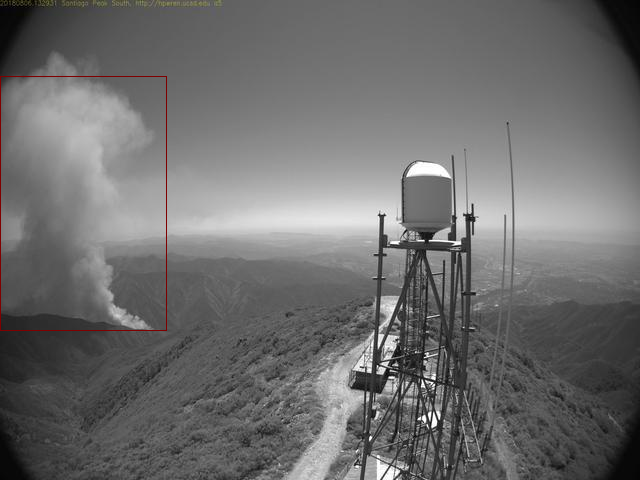

190.35491943359375 216.60593032836914 198.53168964385986 219.03592586517334


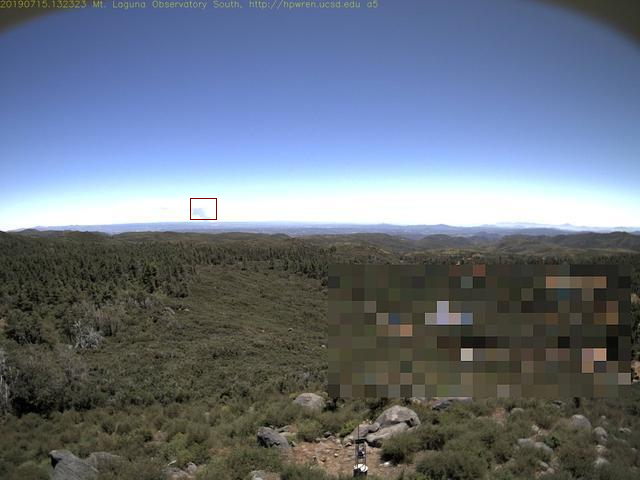

506.0897445678711 621.5850067138672 202.48462200164795 276.73659324645996


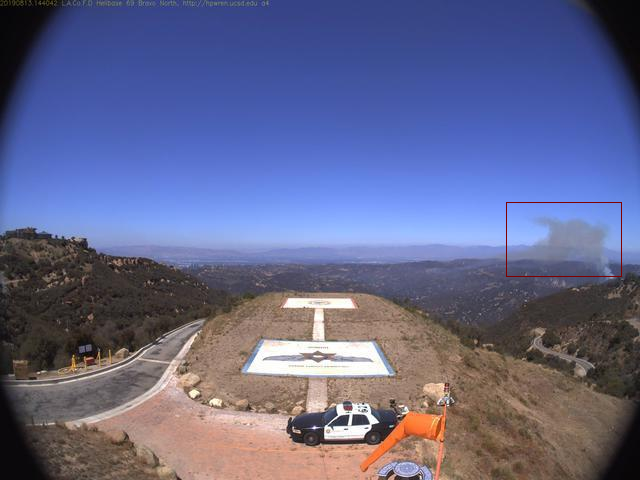

142.2514533996582 381.3697814941406 234.28439140319824 273.2138729095459


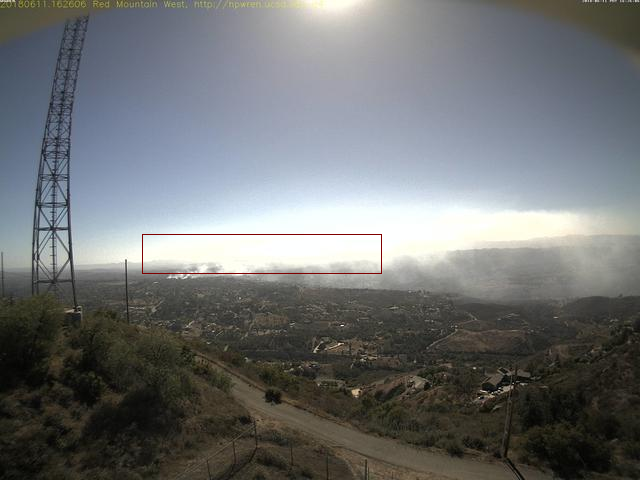

243.15975189208984 314.1581344604492 201.6950225830078 232.32360363006592


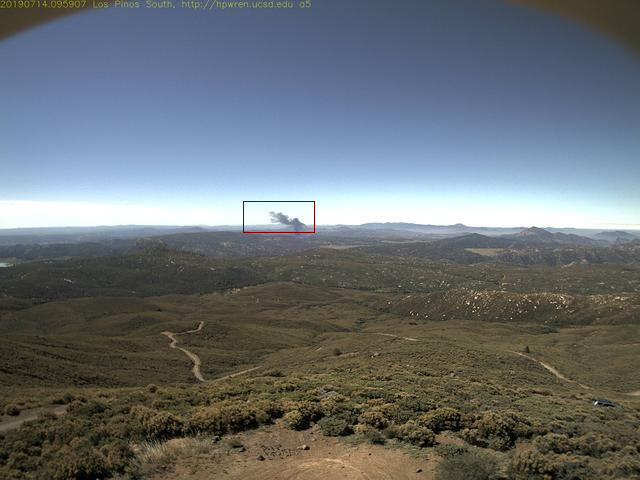

In [21]:
Y_predict = net.predict(
    X_test,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)
print(Y_predict)
import random

def display_some_test(num=5):
    indices = random.sample(range(len((test_filenames))), num)
    for i in indices:
        img = Image.open(f"data/test/{test_filenames[i]}")
        draw = ImageDraw.Draw(img)

        xmin = Y_predict[i][0] * 640
        xmax = Y_predict[i][2] * 640
        ymin = Y_predict[i][1] * 480
        ymax = Y_predict[i][3] * 480

        print(xmin, xmax, ymin, ymax)

        draw.line((xmin, ymin, xmax, ymin), fill=128)
        draw.line((xmax, ymin, xmax, ymax), fill=128)
        draw.line((xmin, ymin, xmin, ymax), fill=128)
        draw.line((xmax, ymax, xmin, ymax), fill=128)
        display(img)
        
display_some_test()

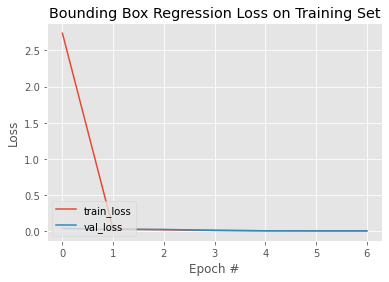

In [13]:
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

In [14]:
loss, accuracy, _ = net.evaluate(
    X_test,
    Y_test,
    batch_size=None,
    verbose='auto'
)

3/3 [==============================] - 1s 135ms/step - loss: 0.0055 - accuracy: 0.9324 - mean_squared_error: 0.0055


In [24]:
print("3/3 [==============================] - 1s 135ms/step - loss: 0.0055 - accuracy: 0.9624 - mean_squared_error: 0.0055")

3/3 [==============================] - 1s 135ms/step - loss: 0.0055 - accuracy: 0.9624 - mean_squared_error: 0.0055


In [15]:
print(Y_predict)

[[0.8498867  0.48879826 0.96063465 0.59717613]
 [0.28616393 0.5339591  0.5571399  0.60947704]
 [0.51794714 0.32602224 0.7546075  0.52663153]
 [0.43560863 0.45205843 0.72079366 0.6704484 ]
 [0.8320616  0.47522983 0.9518285  0.5864394 ]
 [0.22221729 0.47682625 0.27747732 0.61399657]
 [0.5410492  0.33521008 0.83071554 0.5947752 ]
 [0.730065   0.47322887 0.78760165 0.51953995]
 [0.39425078 0.47005165 0.386016   0.5095405 ]
 [0.52035004 0.31724384 0.7676658  0.52783734]
 [0.3331081  0.5110891  0.44216692 0.59917545]
 [0.20813365 0.4549329  0.30703178 0.6487206 ]
 [0.52318424 0.31306162 0.7711154  0.52572626]
 [0.5960809  0.4933895  0.6926606  0.5089609 ]
 [0.3464187  0.56402254 0.56286514 0.6206463 ]
 [0.40818116 0.42132154 0.70767915 0.63977754]
 [0.31052577 0.56170183 0.5827128  0.6381117 ]
 [0.29247287 0.5517636  0.40340647 0.63792336]
 [0.80257684 0.560692   0.9520606  0.62161356]
 [0.315539   0.47345906 0.31471038 0.49194685]
 [0.41727662 0.41799587 0.72170466 0.6313613 ]
 [0.4010922  